In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-covid19-vaccines-tweets/vaccination_all_tweets.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/all-covid19-vaccines-tweets/vaccination_all_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [6]:
# Drop irrelevant columns
df = df.drop(columns=['id', 'user_name', 'user_description', 'user_created', 'source'])

# Drop rows with missing values
df = df.dropna()

# Check again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121239 entries, 0 to 228206
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_location    121239 non-null  object
 1   user_followers   121239 non-null  int64 
 2   user_friends     121239 non-null  int64 
 3   user_favourites  121239 non-null  int64 
 4   user_verified    121239 non-null  bool  
 5   date             121239 non-null  object
 6   text             121239 non-null  object
 7   hashtags         121239 non-null  object
 8   retweets         121239 non-null  int64 
 9   favorites        121239 non-null  int64 
 10  is_retweet       121239 non-null  bool  
dtypes: bool(2), int64(5), object(4)
memory usage: 9.5+ MB


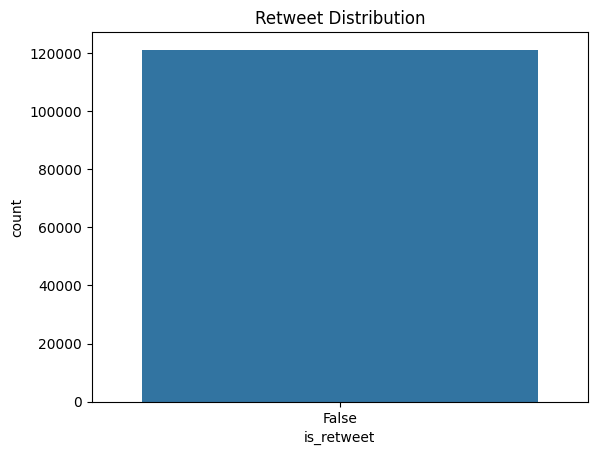

In [7]:
# Retweet distribution
sns.countplot(data=df, x='is_retweet')
plt.title('Retweet Distribution')
plt.show()

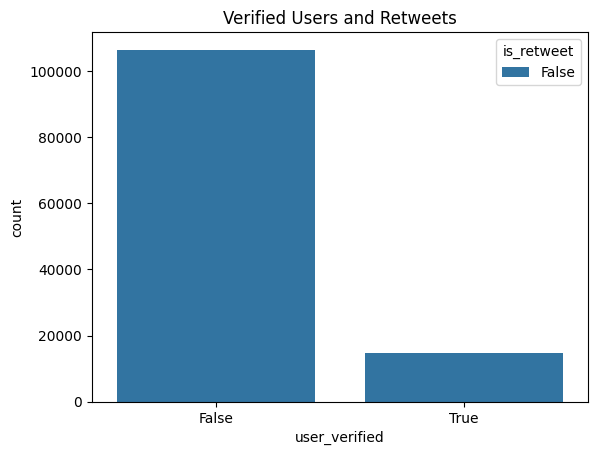

In [8]:
# User verification vs retweet
sns.countplot(data=df, x='user_verified', hue='is_retweet')
plt.title('Verified Users and Retweets')
plt.show()

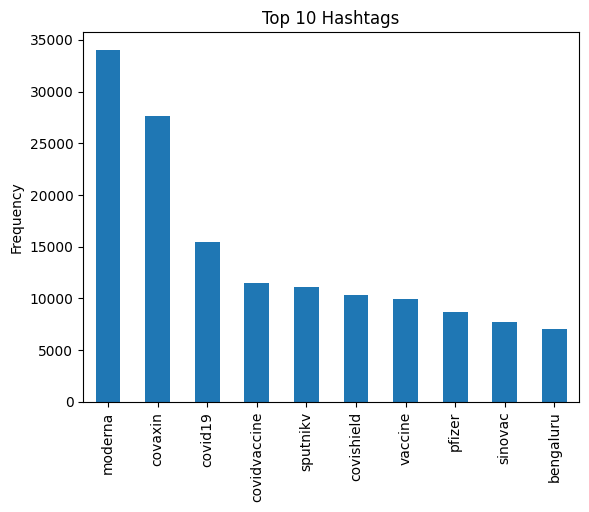

In [9]:
# Most common hashtags
import ast
from collections import Counter

hashtags = df['hashtags'].dropna().apply(ast.literal_eval)
flat_hashtags = [tag.lower() for sublist in hashtags for tag in sublist]
top_tags = pd.Series(Counter(flat_hashtags)).nlargest(10)

top_tags.plot(kind='bar', title='Top 10 Hashtags')
plt.ylabel('Frequency')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()
df['user_location'] = le.fit_transform(df['user_location'].astype(str))
df['text'] = le.fit_transform(df['text'].astype(str))
df['hashtags'] = le.fit_transform(df['hashtags'].astype(str))

In [11]:
# Features & label
X = df[['user_location', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'text', 'hashtags']]
y = df['is_retweet']

In [12]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Model
model = LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 96991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 96991, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

LGBMClassifier()

In [14]:
# Predict & evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     24248

    accuracy                           1.00     24248
   macro avg       1.00      1.00      1.00     24248
weighted avg       1.00      1.00      1.00     24248



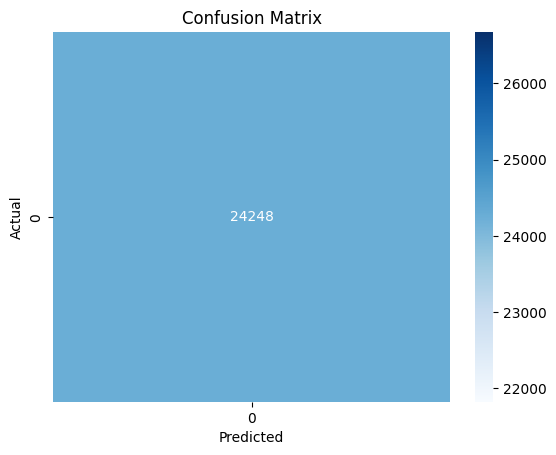

In [15]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()